# Olympic Games Exploratory Data Analysis

Before we begin, let's set up some useful settings:
- Max number of columns to be displayed = 100
- Max number of columns to be displayed = 100

In [4]:
import pandas as pd

pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100) 

### First step: read and glimpse the dataset

In this EDA, we'll use the ["120 years of Olympic history: athletes and results"](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) Kaggle dataset, locally available in this repo in  `raw_data\athlete_events.csv` . 

Let's first read the dataset:

In [5]:
df = pd.read_csv("raw_data/athlete_events.csv")

### Q0: How many rows and columns are there in this dataset?


In [6]:
print(df.shape)

(271116, 15)


Over 271 thousand competitors in the last 120 years of Olympics! Wow!



Let's get some basic info on the available data:

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


Lots of infos available! Let's take a glimpse on actual data:

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Each row represents a competitor in a specific event from a specific olympic games. Interesting, very interesting.

### Q1: Which are the oldest olympic summer and winter games with data available in the dataset?

To solve this one, we may resort to the `np.sort()` function:


In [9]:
import numpy as np

np.sort(df['Year'].unique()) # .unique() to return only one ocurrence for each olympic year

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

The first olympic game with data available is actually the first one in modern age, 1896 Olympic Summer games, in Athens. 



### Q2: Which game had the greatest number of registered competitors?

To answer this one, we may resort to `df.value_counts()` :

In [10]:
df['Year'].value_counts()

1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

Well, the one with greatest number of competitors was not one of the last ones, but rather the 1992 Summer Games! Very interesting!



### Q3.1: What is the range of competing athletes' age?

This one is rather simple:

In [13]:
import numpy as np

min_age_all_sports = np.amin(df['Age'])

max_age_all_sports = np.amax(df['Age'])

print(f'Age ranging from {min_age_all_sports} to {max_age_all_sports}')

Age ranging from 10.0 to 97.0


### Q3.2: What is the most common athlete age found in games?

One could guess that most athletes are young, in their finest physical forms. But is this true? Let's find out.

In [21]:
df.groupby(by="Age")["Age"].count().sort_values(ascending=False).head()

Age
23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
Name: Age, dtype: int64

Interesting! Most common age is 23 years old, followed by ages in twenties range. But is the age spread or tightly concentrade around this value?


In [27]:
df["Age"].describe() # display all major statistics (mean, median, std, quartiles) at once

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

Well, indeed, most athletes (75%) had 28 or less years while competing. The youngest of all was a 10-year old child! And the oldest one was a 97-year old senior! Impressive!

Is Age "evenly distributed", in the sense of being not side-skewed or not too spiked  /flatted? We can quickly glance this by looking at its kurtosis and skewness values.

In [36]:
df["Age"].skew() # retrieve its skewness

1.747122537787137

So, as Age distribution has a positive skewness, it is right-skewed, i.e. skewed towards the right, having its most common value (mode), mean and median all concentrated in the left side, with a long tail to the right

In [37]:
df["Age"].kurt() # retrieve its kurtosis

6.27064244661449

As Age distribution has a kurtosis > 3, it is leptokurtic, i.e. a little "spikier" than normal distribution, with more mass concentrated around its central values (mean, median, mode).

By only looking at its kurtosis and skewness, we found Age distritubion is assymetric to the left (i.e. with smaller values of Age being more common) and "spikier" (i.e. much concentrated around mean, median and mode). If are a "seeing is believing" kind of person, let's make a simple histogram/distribution graph to confirm it:

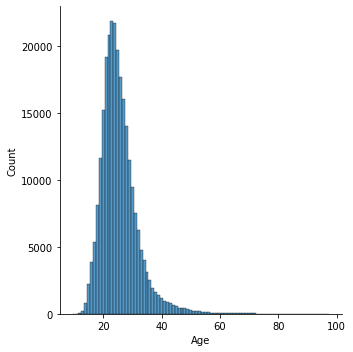

In [39]:
import seaborn as sns

sns.displot(df["Age"], discrete=True)

Just as we have found previously!

So, this brief analysis confirm that, in general, most athletes are very young while competing, relying in their finest physical forms to complete most sports' events. 

But.. does this result hold for most sports? Is there a sport where seniors compete most? We shall see this one next. But first, one may ask: is medal-winners Age distribution any how similar to the general athlete distribution? Let's find out.

In [40]:
df.query('Medal in ("Gold", "Silver", "Bronze")')["Age"].describe()

count    39051.000000
mean        25.925175
std          5.914026
min         10.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         73.000000
Name: Age, dtype: float64

In [42]:
print(df.query('Medal in ("Gold", "Silver", "Bronze")')["Age"].kurt())
print(df.query('Medal in ("Gold", "Silver", "Bronze")')["Age"].skew())

4.6159894422695835
1.4975894843728454


So, winners' distribution is quite similar, assimetric to the left and spikier, but less so. We can check this in its distribution plot.

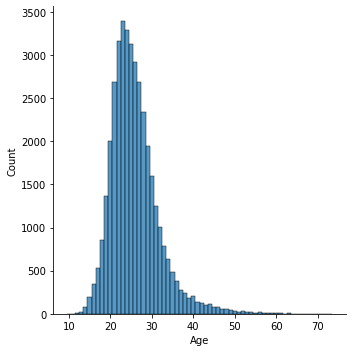

In [46]:
sns.displot(df.query('Medal in ("Gold", "Silver", "Bronze")')["Age"], discrete=True)

Its form is very similar, see? OK, it's not that easy to see just looking at each graph. Let's plot them overlapped.

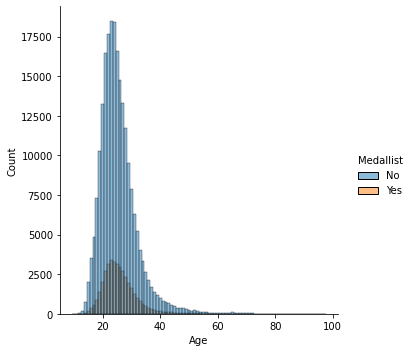

In [68]:
mod_df = df.assign(Medallist=["Yes" if Medal in ("Gold", "Silver", "Bronze") else "No" for Medal in df.Medal ])[["Age", "Medallist"]] # compute a new column "Medallist" telling if athlete was or not a medalist (regardless of whic medal it achieved)


sns.displot(mod_df, x="Age", hue ="Medallist", discrete=True) 

Now, you see! Medallists' and non-medalists' Age distribution is very similar, with Medallist much less frequent (of course).

### Q3.3: What is the distribution of age in various sports?

Now, to answer this one, we must look not only at the most common value, but also other meaningful statistics of Age attribute in various sports. Let's start with the usual `describe` method:

In [70]:
df[['Age', 'Sport']].groupby('Sport').describe()

Age                                          \
                             count       mean        std   min   25%   50%   
Sport                                                                        
Aeronautics                    1.0  26.000000        NaN  26.0  26.0  26.0   
Alpine Skiing               8751.0  23.205462   3.987876  14.0  20.0  23.0   
Alpinism                      16.0  38.812500   9.703736  22.0  33.0  38.0   
Archery                     2254.0  27.935226   8.880789  14.0  22.0  26.0   
Art Competitions            3071.0  45.901009  12.717193  14.0  37.0  45.0   
Athletics                  37507.0  25.161223   4.398260  12.0  22.0  25.0   
Badminton                   1457.0  25.671242   3.907369  16.0  23.0  25.0   
Baseball                     893.0  26.240761   4.562377  16.0  23.0  26.0   
Basketball                  4350.0  25.324598   3.881247  16.0  22.0  25.0   
Basque Pelota                  2.0  26.000000   0.000000  26.0  26.0  26.0   
Beach Volleyball             564.0  29.122340   4.225558  18.0  26.0  29.0   
Biathlon                    4892.0  26.532911   4.289410  17.0  23.0  26.0   
Bobsleigh                   2986.0  29.110181   5.437655  15.0  25.0  28.0   
Boxing                      5729.0  23.054809   3.442433  15.0  20.0  23.0   
Canoeing                    6136.0  25.504400   4.543117  15.0  22.0  25.0   
Cricket                       18.0  29.333333   6.287242  21.0  24.0  27.5   
Croquet                       15.0  33.733333  13.961512  15.0  22.0  33.0   
Cross Country Skiing        9098.0  26.006155   4.298621  15.0  23.0  26.0   
Curling                      463.0  31.412527   7.259597  17.0  26.0  30.0   
Cycling                    10181.0  24.773991   4.427754  14.0  21.0  24.0   
Diving                      2721.0  22.481441   4.397832  12.0  19.0  22.0   
Equestrianism               6151.0  34.390831   8.427678  16.0  28.0  33.0   
Fencing                    10020.0  28.538822   6.537185  14.0  24.0  28.0   
Figure Skating              2274.0  22.232190   4.989095  11.0  19.0  22.0   
Football                    6370.0  23.693250   3.554183  15.0  21.0  23.0   
Freestyle Skiing             937.0  24.426894   4.634648  13.0  21.0  24.0   
Golf                         235.0  29.408511   8.057693  15.0  23.0  28.0   
Gymnastics                 25528.0  22.733038   4.904988  10.0  19.0  22.0   
Handball                    3633.0  26.308010   4.147286  14.0  23.0  26.0   
Hockey                      5213.0  25.716862   4.038573  15.0  23.0  25.0   
Ice Hockey                  5487.0  25.831420   4.439554  15.0  23.0  25.0   
Jeu De Paume                  11.0  32.454545   8.250620  19.0  29.0  31.0   
Judo                        3763.0  25.329524   3.918813  14.0  23.0  25.0   
Lacrosse                      36.0  26.861111   4.934733  14.0  24.0  26.0   
Luge                        1477.0  24.626269   4.884971  15.0  21.0  24.0   
Military Ski Patrol           19.0  23.736842   3.052178  20.0  21.0  24.0   
Modern Pentathlon           1624.0  26.388547   4.168939  15.0  23.0  26.0   
Motorboating                  15.0  33.333333   8.217287  26.0  28.0  31.0   
Nordic Combined             1335.0  24.342322   3.910214  15.0  22.0  24.0   
Polo                          90.0  35.333333   6.685554  21.0  31.0  35.0   
Racquets                      12.0  28.666667   8.605847  19.0  22.5  27.0   
Rhythmic Gymnastics          658.0  18.737082   2.505250  13.0  17.0  18.0   
Roque                          3.0  53.333333  14.364308  37.0  48.0  59.0   
Rowing                     10069.0  25.276294   4.422526  11.0  22.0  25.0   
Rugby                        114.0  24.385965   3.506022  18.0  22.0  24.0   
Rugby Sevens                 299.0  26.046823   3.772625  18.0  23.0  26.0   
Sailing                     6301.0  30.288843   7.992956  13.0  25.0  29.0   
Shooting                   10627.0  33.422226   8.573508  15.0  27.0  33.0   
Short Track Speed Skating   1534.0  22.804433   3.803

Looking at table above, we see some interesting facts:
* Rhythmic Gymnastics is a clear outlier with youger athletes - its 75th-percentile is 20 years old!
* Shooting, Polo, Equestrianism, Croquet, Alpinism, Art Competitions, Roque are outliers with older athletes - their 75th-percentile are 39, 39, 40, 42.5, 47.5, 54, 61.5 years old, respectively!
* More popular team sports like Football (Soccer), Volleyball, Basketball are very alike and aligned with general statistics - their 75th-percentile are 26, 28, 28 years old, respectively


To better see the relationship, let's plot some of the above cited sports.

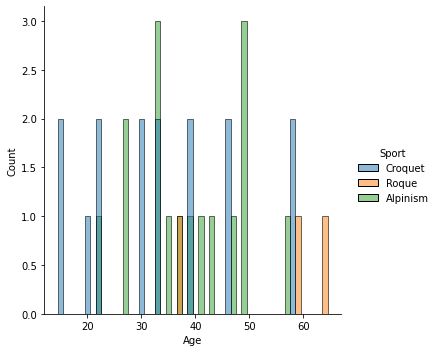

In [88]:
sports_df = df.query(' Sport in ("Croquet", "Alpinism", "Roque") ')[['Age', 'Sport']] # selecting less popular sports together, to not distort graph with very different count scales

sns.displot(sports_df, x="Age", hue ="Sport", discrete=True) 

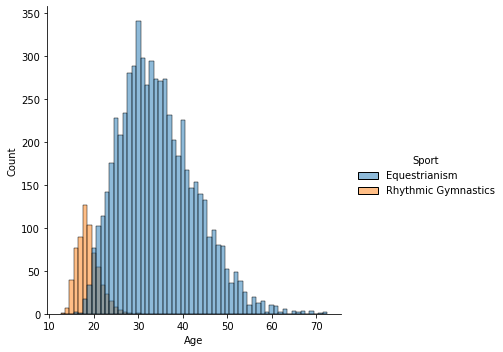

In [93]:
sports_df = df.query(' Sport in ("Rhythmic Gymnastics", "Equestrianism") ')[['Age', 'Sport']] # selecting somewhat popular sports, to not distort graph with very different count scales

sns.displot(sports_df, x="Age", hue ="Sport", discrete=True) 

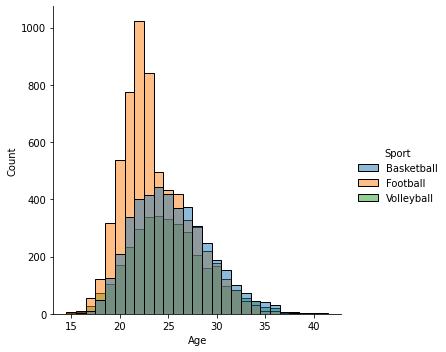

In [94]:
sports_df = df.query(' Sport in ("Football", "Volleyball", "Basketball") ')[['Age', 'Sport']] # selecting very popular sports, to not distort graph with very different count scales

sns.displot(sports_df, x="Age", hue ="Sport", discrete=True) 

Now, it's important to note that some sports may have policies restricting teams mainly to youger athletes. This is indeed the case of Football, which has a policy restricting the number of athletes with more than 23 years, which clearly reflects in its above graph.